In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
Listing = pd.read_csv("Listings.csv", encoding='ISO-8859-1', low_memory=False)

In [6]:
Listing.head()

listing_id                                              name   host_id  \
0      281420    Beautiful Flat in le Village Montmartre, Paris   1466919   
1     3705183                   39 mÃÂ² Paris (Sacre CÃ
âur)  10328771   
2     4082273               Lovely apartment with Terrace, 60m2  19252768   
3     4797344               Cosy studio (close to Eiffel tower)  10668311   
4     4823489  Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   

   host_since                 host_location host_response_time  \
0  2011-12-03  Paris, Ile-de-France, France                NaN   
1  2013-11-29  Paris, Ile-de-France, France                NaN   
2  2014-07-31  Paris, Ile-de-France, France                NaN   
3  2013-12-17  Paris, Ile-de-France, France                NaN   
4  2014-12-14  Paris, Ile-de-France, France                NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                 NaN                   NaN                 f   
1                 NaN                   NaN                 f   
2                 NaN                   NaN                 f   
3                 NaN                   NaN                 f   
4                 NaN                   NaN                 f   

   host_total_listings_count  ... minimum_nights maximum_nights  \
0                        1.0  ...              2           1125   
1                        1.0  ...              2           1125   
2                        1.0  ...              2           1125   
3                        1.0  ...              2           1125   
4                        1.0  ...              2           1125   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                100.0                   10.0                      10.0   
1                100.0                   10.0                      10.0   
2                100.0                   10.0                      10.0   
3                100.0                   10.0                      10.0   
4                100.0                   10.0                      10.0   

   review_scores_checkin  review_scores_communication review_scores_location  \
0                   10.0                         10.0                   10.0   
1                   10.0                         10.0                   10.0   
2                   10.0                         10.0                   10.0   
3                   10.0                         10.0                   10.0   
4                   10.0                         10.0                   10.0   

  review_scores_value  instant_bookable  
0                10.0                 f  
1                10.0                 f  
2                10.0                 f  
3                10.0                 f  
4                10.0                 f  

[5 rows x 33 columns]

In [ ]:
import pandas as pd  # ← Add this line if not already executed

listing = pd.read_csv("Listings.csv", encoding='ISO-8859-1', low_memory=False)
listing.info()

# showing "host_since" as object data type as text, but that is false, this is an integer data type means date & time 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [ ]:
# cast any data columns as a datetime formate
listing["host_since"] = pd.to_datetime(listing["host_since"])
# this converts the "host_since" object datatype formate to datatime formate and then overwrite it. 
listing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [ ]:
# filtering with where City is  Paris
paris_listing = (
                listing
                .query("city == 'Paris'")
                .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)
# assuming "listing" is a pandas DataFrame
# .query("city == 'Paris'") selects only those rows where the 'city' column has the value 'Paris'
# .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]] selects specific columns from the filtered DataFrame
# : before the comma means "select all rows"

paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [ ]:
# search for missing values
# previous shows that "host_since" has (64690 - 64657) = 33 null values
paris_listing.isna()

host_since  neighbourhood   city  accommodates  price
0            False          False  False         False  False
1            False          False  False         False  False
2            False          False  False         False  False
3            False          False  False         False  False
4            False          False  False         False  False
...            ...            ...    ...           ...    ...
279707       False          False  False         False  False
279708       False          False  False         False  False
279709       False          False  False         False  False
279710       False          False  False         False  False
279711       False          False  False         False  False

[64690 rows x 5 columns]

In [ ]:
paris_listing.isna().sum()
# The amount of missing data: 33 out of 64,690 entries (from 64690 rows x 5 columns in the paris_listing DataFrame) is a very small percentage (frac3364690 approx0.0005, or 0.05%).

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [ ]:
# Create a copy to avoid modifying the original 'paris_listing' if you want to keep it
paris_listing_cleaned_drop = paris_listing.copy()

# Drop rows where 'host_since' is null
paris_listing_cleaned_drop.dropna(subset=['host_since'], inplace=True)

# Verify
print("Shape after dropping nulls:", paris_listing_cleaned_drop.shape)
print("Nulls after dropping:", paris_listing_cleaned_drop['host_since'].isnull().sum())

paris_listing_cleaned_drop.info()


paris_listing.info()



Shape after dropping nulls: (64657, 5)
Nulls after dropping: 0
<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64657 non-null  object        
 2   city           64657 non-null  object        
 3   accommodates   64657 non-null  int64         
 4   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64       

In [ ]:
# "paris_listing" statistical analysis
paris_listing.describe()
# there can't be a min of 0.00000, there must be some problem

host_since  accommodates         price
count                          64657  64690.000000  64690.000000
mean   2015-11-01 11:06:05.528867584      3.037997    113.096445
min              2008-08-30 00:00:00      0.000000      0.000000
25%              2014-03-09 00:00:00      2.000000     59.000000
50%              2015-07-07 00:00:00      2.000000     80.000000
75%              2017-05-29 00:00:00      4.000000    120.000000
max              2021-02-07 00:00:00     16.000000  12000.000000
std                              NaN      1.588766    214.433668

In [31]:
# see how many values containing min of 0 
paris_listing.query("accommodates == 0.000000")#.count()

host_since        neighbourhood   city  accommodates  price
98209  2020-07-20             Pantheon  Paris             0      0
203257 2020-02-04  Batignolles-Monceau  Paris             0      0
203258 2016-10-17                Opera  Paris             0      0
203259 2020-04-24           Luxembourg  Paris             0      0
203260 2020-04-24            Vaugirard  Paris             0      0
203261 2020-07-15  Batignolles-Monceau  Paris             0      0
203263 2016-06-07       Palais-Bourbon  Paris             0      0
203264 2020-09-08             Pantheon  Paris             0      0
203265 2020-09-21            Vaugirard  Paris             0      0
203267 2020-10-29         Observatoire  Paris             0      0
203268 2020-11-04                Opera  Paris             0      0
203269 2020-11-10    Buttes-Montmartre  Paris             0      0
205561 2020-10-29            Vaugirard  Paris             0      0
205562 2020-11-05              Reuilly  Paris             0      0
206501 2020-09-16                Opera  Paris             0      0
207077 2019-12-17       Palais-Bourbon  Paris             0      0
207078 2020-04-20         Observatoire  Paris             0      0
207079 2020-04-27             Pantheon  Paris             0      0
207080 2020-08-05            Vaugirard  Paris             0      0
207081 2020-09-04                Passy  Paris             0      0
207082 2020-09-07  Batignolles-Monceau  Paris             0      0
207083 2020-09-10               Elysee  Paris             0      0
207084 2020-09-16            Vaugirard  Paris             0      0
207086 2020-06-08    Enclos-St-Laurent  Paris             0      0
208303 2020-04-15       Palais-Bourbon  Paris             0      0
208304 2020-12-15               Louvre  Paris             0      0
208858 2020-02-04    Enclos-St-Laurent  Paris             0      0
208859 2020-02-04               Elysee  Paris             0      0
208860 2020-02-05         Menilmontant  Paris             0      0
208861 2020-02-04              Reuilly  Paris             0      0
208862 2020-02-04               Bourse  Paris             0      0
208863 2020-02-04               Louvre  Paris             0      0
208864 2020-02-04            Vaugirard  Paris             0      0
208865 2020-02-05            Vaugirard  Paris             0      0
208866 2020-02-05         Observatoire  Paris             0      0
208867 2019-10-30               Elysee  Paris             0      0
208868 2016-10-06               Bourse  Paris             0      0
208869 2020-04-24               Elysee  Paris             0      0
208870 2020-05-12           Popincourt  Paris             0      0
208871 2020-06-02       Palais-Bourbon  Paris             0      0
208872 2020-07-15    Buttes-Montmartre  Paris             0      0
208873 2020-07-23           Popincourt  Paris             0      0
208874 2020-08-12       Palais-Bourbon  Paris             0      0
208875 2020-08-12       Palais-Bourbon  Paris             0      0
208876 2020-08-12            Vaugirard  Paris             0      0
208877 2020-09-17    Enclos-St-Laurent  Paris             0      0
208878 2020-10-09                Passy  Paris             0      0
208879 2020-04-15               Elysee  Paris             0      0
208880 2020-10-21               Elysee  Paris             0      0
208881 2020-10-22             Pantheon  Paris             0      0
208882 2020-11-26    Enclos-St-Laurent  Paris             0      0
208883 2020-11-26            Vaugirard  Paris             0      0
208884 2020-12-21            Vaugirard  Paris             0      0
212834 2020-02-03    Enclos-St-Laurent  Paris             0      0

In [30]:
paris_listing.query("accommodates == 0.000000").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [32]:
# Create a copy to avoid modifying the original 'paris_listing' if you want to keep it
# This assumes 'paris_listing' is your current DataFrame (potentially already cleaned for host_since nulls)
paris_listing_cleaned_accommodates = paris_listing.copy()

# Drop rows where 'accommodates' is 0
# We use boolean indexing directly here to select rows where 'accommodates' is NOT equal to 0
# Then we assign this filtered DataFrame back to our cleaned copy.
paris_listing_cleaned_accommodates = paris_listing_cleaned_accommodates[paris_listing_cleaned_accommodates['accommodates'] != 0]

# Verify
print("Shape after dropping rows with accommodates == 0:", paris_listing_cleaned_accommodates.shape)
# To verify the 0 values are gone, you can count them again:
print("Count of 'accommodates' == 0 after dropping:", 
      paris_listing_cleaned_accommodates.query("accommodates == 0").count()['accommodates'])

paris_listing_cleaned_drop.info()

Shape after dropping rows with accommodates == 0: (64636, 5)
Count of 'accommodates' == 0 after dropping: 0
<class 'pandas.core.frame.DataFrame'>
Index: 64657 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64657 non-null  object        
 2   city           64657 non-null  object        
 3   accommodates   64657 non-null  int64         
 4   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [33]:
paris_listing.query("accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [ ]:
# 1.Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)
paris_listings_neighbourhood=(
            paris_listing
            .groupby("neighbourhood")
            .agg({"price": "mean"})
            .sort_values("price")
)

paris_listings_neighbourhood.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Menilmontant to Elysee
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes


In [ ]:
#lowest price in paris_listings_neighbourhood 
paris_listings_neighbourhood.head()

price
neighbourhood               
Menilmontant       74.942257
Buttes-Chaumont    82.690182
Buttes-Montmartre  87.209479
Reuilly            89.058402
Popincourt         90.559459

In [ ]:
#highest price in paris_listings_neighbourhood 
paris_listings_neighbourhood.tail()

price
neighbourhood             
Luxembourg      155.638639
Palais-Bourbon  156.856578
Passy           161.144635
Louvre          175.379972
Elysee          210.536765

In [39]:
# show all 20 values of "paris_listings_neighbourhood"
print(paris_listings_neighbourhood)

                          price
neighbourhood                  
Menilmontant          74.942257
Buttes-Chaumont       82.690182
Buttes-Montmartre     87.209479
Reuilly               89.058402
Popincourt            90.559459
Gobelins              98.110184
Observatoire         101.866801
Batignolles-Monceau  102.612702
Enclos-St-Laurent    102.967156
Vaugirard            106.831330
Opera                119.038644
Pantheon             122.662150
Temple               138.446823
Hotel-de-Ville       144.472110
Bourse               149.496801
Luxembourg           155.638639
Palais-Bourbon       156.856578
Passy                161.144635
Louvre               175.379972
Elysee               210.536765


In [43]:
# 2.Create a table named paris_listings_accomodations, 
# filter down to the most expensive neighborhood, 
# group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

# here most expensive neighborhood = "Elysee"
paris_listings_accomodations=(
              paris_listing
              .query("neighbourhood == 'Elysee'")
              .groupby("accommodates")    
              .agg({"price" : "mean"})  
              .sort_values("price")
)

print(paris_listings_accomodations)


                   price
accommodates            
0               0.000000
1              79.522222
3             152.828767
2             155.103352
4             212.096070
5             328.817073
6             355.508571
8             405.518519
7             411.538462
9             440.272727
10            500.857143
12            529.625000
16            800.000000
11            805.000000
13            842.500000
14            971.000000


In [ ]:
#Create a table called paris_listings_over_time grouped by the ‘host_since’ year, 
#and calculate the average price and count of rows representing the number of new hosts
paris_listings_over_time=(
             paris_listing
             .set_index("host_since")
             .resample("YE")
             .agg({
                 "neighbourhood" : "count",
                 "price" : "mean"
                 })
) 

paris_listings_over_time['price'] = paris_listings_over_time['price'].round(2)
paris_listings_over_time.style.format({"price": "${:.2f}"})

print(paris_listings_over_time)

            neighbourhood   price
host_since                       
2008-12-31              4   77.75
2009-12-31            106  159.64
2010-12-31            416  125.03
2011-12-31           1339  124.83
2012-12-31           4592  111.58
2013-12-31           8142  107.10
2014-12-31          10922  100.25
2015-12-31          12147  103.65
2016-12-31           8871  114.16
2017-12-31           4585  108.66
2018-12-31           4294  138.21
2019-12-31           5694  129.76
2020-12-31           3412  141.46
2021-12-31            133   93.49


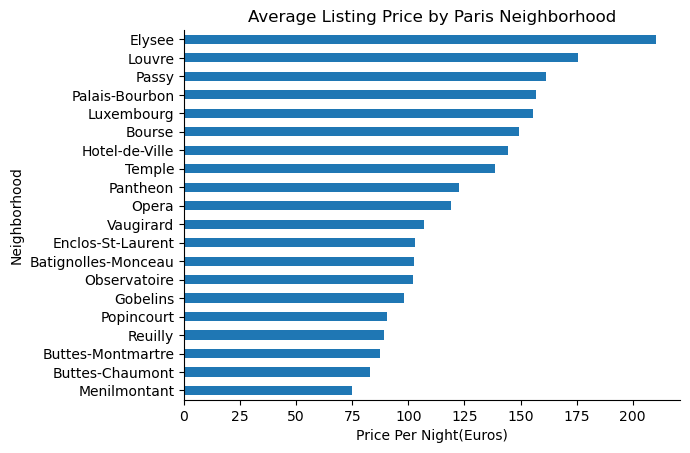

In [60]:
#Create a horizontal bar chart of the average price by neighborhood in Paris,
# and make sure to add a title and change axis labels as needed

import seaborn as sns

(paris_listings_neighbourhood
    .plot
    .barh(                                                                  #barh = horizontal bar
        title="Average Listing Price by Paris Neighborhood",
        xlabel="Price Per Night(Euros)",
        ylabel="Neighborhood",
        legend=None
    )
)

sns.despine()                                                                #sns = seaborn  
                                                                             #despine = remove the outline borders

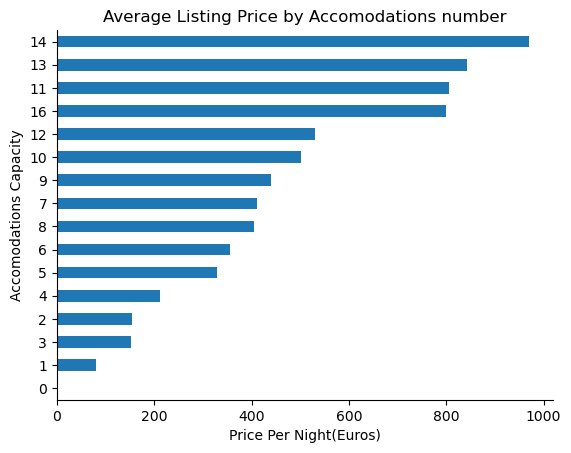

In [ ]:
#Create a horizontal bar chart of the average price by listing accomodations in paris,
# and make sure to add a title and change axis labels as needed


(paris_listings_accomodations
    .plot
    .barh(                                                                  
        title="Average Listing Price by Accomodations number",
        xlabel="Price Per Night(Euros)",
        ylabel="Accomodations Capacity",
        legend=None
    )
)

sns.despine()


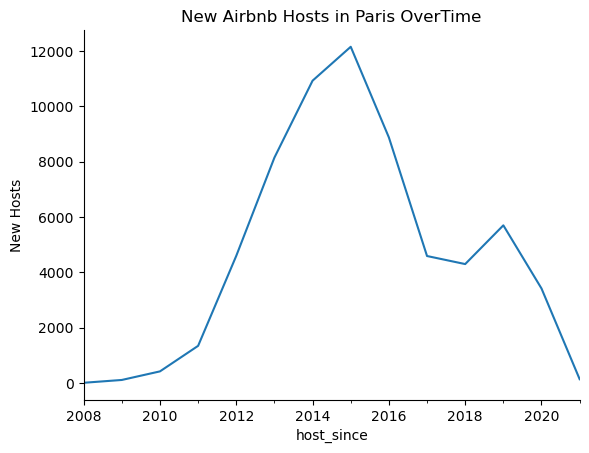

In [71]:
#Create two line charts: one showing the count of new hosts over time, 
# and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

#the count of new hosts over time
paris_listings_over_time["neighbourhood"].plot(
                                ylabel="New Hosts",
                                title="New Airbnb Hosts in Paris OverTime"

)

sns.despine()

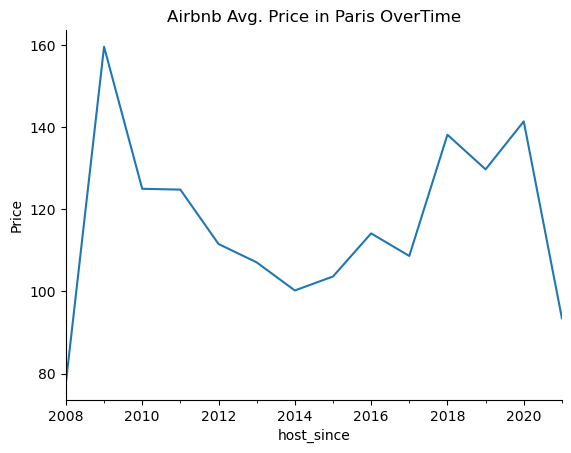

In [72]:
#the average price over time
paris_listings_over_time["price"].plot(
                                ylabel="Price",
                                title="Airbnb Avg. Price in Paris OverTime"

)

sns.despine()


Text(0.5, 1.0, '2015-16 Regulations lead to fewer New Hosts and Higher Prices')

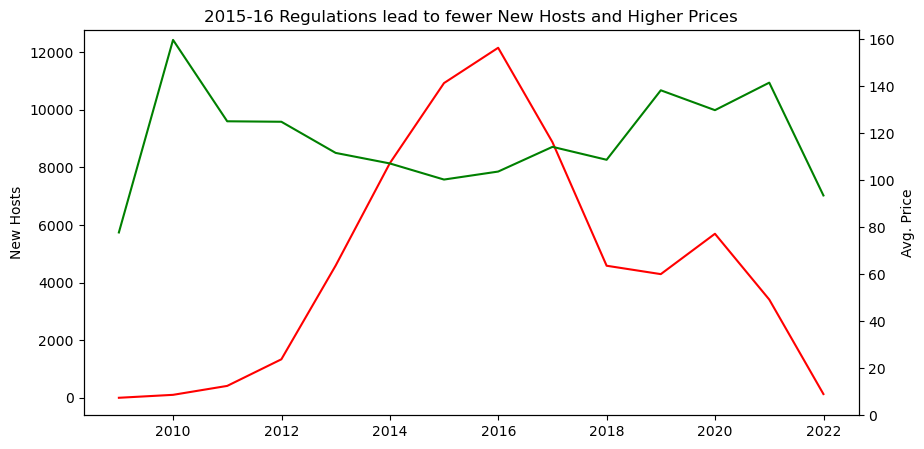

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="Red"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()                            #Create two line charts

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Avg. Price",
    c="Green"
)
ax2.set_ylim(0)                              #Set the y-axis limit to 0
ax2.set_ylabel("Avg. Price")


ax.set_title("2015-16 Regulations lead to fewer New Hosts and Higher Prices")
